<a href="https://colab.research.google.com/github/AdminGirl/Saida-s-project/blob/main/GPA_Clustering_using_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/gpa_study_hours.csv')
df.head()

,gpa,study_hours
0,4.00,10.0
1,3.80,25.0
2,3.93,45.0
3,3.40,10.0
4,3.20,4.0


Scatter Plot

Text(0, 0.5, 'study_hours')

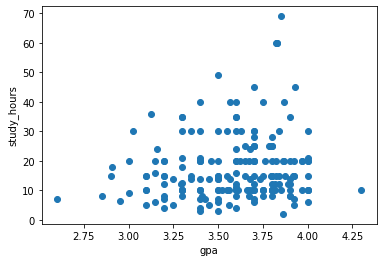

In [ ]:
plt.scatter(df.gpa,df.study_hours)
plt.xlabel('gpa')
plt.ylabel('study_hours')

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df)
scaled = pd.DataFrame(scaler.transform(df),columns=df.columns)
scaled.head()

,gpa,study_hours
0,0.823529,0.119403
1,0.705882,0.343284
2,0.782353,0.641791
3,0.470588,0.119403
4,0.352941,0.029851


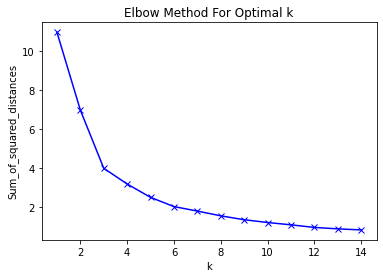

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(scaled)
labels = k_means.labels_
print(labels)

[2 3 1 0 0 0 3 3 2 2 3 0 2 1 0 2 0 3 2 3 1 0 2 3 2 0 2 2 3 3 0 0 2 2 0 3 2
 2 2 0 2 0 3 0 0 2 3 3 3 2 2 1 0 2 2 3 3 3 3 0 2 0 0 2 2 2 0 0 2 2 3 2 0 2
 2 0 0 1 0 2 2 0 2 1 2 2 0 2 2 1 2 0 2 2 3 2 2 2 3 3 3 2 3 2 3 2 2 3 0 2 0
 0 3 3 2 3 0 0 2 3 2 3 1 0 2 1 2 3 2 0 1 0 2 0 0 1 2 0 2 0 2 0 2 2 0 3 2 2
 2 2 0 2 0 2 0 0 0 0 0 3 0 3 3 2 2 0 3 2 3 1 2 2 0 0 2 0 0 3 2 3 0 2 3 0 2
 3 2 0 3 2 2 2 0]


In [ ]:
k_means.cluster_centers_

array([[0.38874377, 0.1449532 ],
       [0.68377451, 0.69527363],
       [0.70577066, 0.15303231],
       [0.58283174, 0.36272128]])

In [ ]:
df["Cluster"] = labels
df.head(5)

,gpa,study_hours,Cluster
0,4.00,10.0,2
1,3.80,25.0,3
2,3.93,45.0,1
3,3.40,10.0,0
4,3.20,4.0,0


In [ ]:
df.groupby('Cluster').mean()

,gpa,study_hours
Cluster,,
0,3.260864,11.711864
1,3.762417,48.583333
2,3.799810,12.253165
3,3.590814,26.302326


In [ ]:
df.groupby('Cluster').count()

,gpa,study_hours
Cluster,,
0,59,59
1,12,12
2,79,79
3,43,43


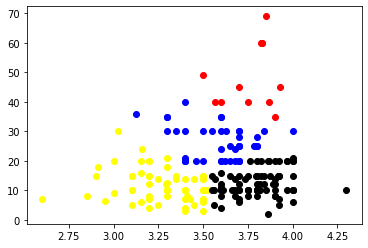

In [ ]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]
df4 = df[df.Cluster==3]

plt.scatter(df1.gpa,df1.study_hours,color='yellow')
plt.scatter(df2.gpa,df2.study_hours,color='red')
plt.scatter(df3.gpa,df3.study_hours,color='black')
plt.scatter(df4.gpa,df4.study_hours,color='blue')


In [ ]:
frame = pd.DataFrame(scaled)
frame['Cluster'] = labels
frame['Cluster'].value_counts()

2    79
0    59
3    43
1    12
Name: Cluster, dtype: int64

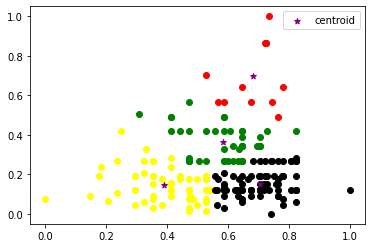

In [ ]:
df1 = scaled[scaled.Cluster==0]
df2 = scaled[scaled.Cluster==1]
df3 = scaled[scaled.Cluster==2]
df4 = scaled[scaled.Cluster==3]
plt.scatter(df1.gpa,df1.study_hours,color='yellow')
plt.scatter(df2.gpa,df2.study_hours,color='red')
plt.scatter(df3.gpa,df3.study_hours,color='black')
plt.scatter(df4.gpa,df4.study_hours,color='green')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()